# ARIMA

In [50]:
import pandas as pd
import ssl
import urllib.request
import io


context = ssl._create_unverified_context()
response = urllib.request.urlopen('https://raw.githubusercontent.com/PJalgotrader/Deep_forecasting-USU/refs/heads/main/data/US_macro_Quarterly.csv', context=context)
csv_data = response.read().decode('utf-8')
df = pd.read_csv(io.StringIO(csv_data))
df.head()

,Unnamed: 0,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959-03-31,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1959-06-30,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1959-09-30,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,1959-12-31,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,1960-03-31,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


In [51]:
# print starting and ending dates
print("Starting date:", df['Unnamed: 0'][0])
print("Ending date:", df['Unnamed: 0'][len(df)-1])

Starting date: 1959-03-31
Ending date: 2009-09-30


In [52]:
df['Unnamed: 0'] = pd.to_datetime(df['Unnamed: 0'])
df.set_index(pd.PeriodIndex(df['Unnamed: 0'], freq='Q'), inplace=True)
df.drop(columns=['Unnamed: 0'], inplace=True)

In [53]:
# keep 'cpi' drop the other columns
df = df[['cpi']]

<Axes: xlabel='Unnamed: 0'>

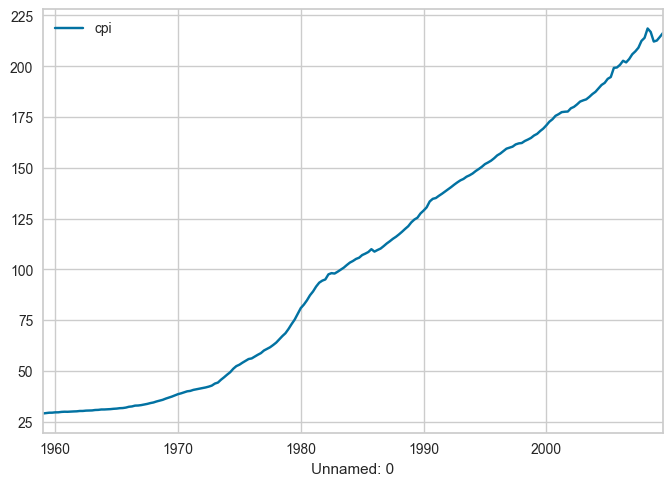

In [54]:
#  plot the data
df.plot()

The data is not stationary due to the upward trend. We would need to do differencing in this instance. The growth appears to be somewhat exponential. Seasonality is hard to glean from this graph. 

In [55]:
from pycaret.time_series import *

In [56]:
# creating pycaret time series experiment
exp = TSForecastingExperiment()
exp.setup(data=df, fh=24, session_id=4259)

,Description,Value
0,session_id,4259
1,Target,cpi
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Original data shape,"(203, 1)"
5,Transformed data shape,"(203, 1)"
6,Transformed train set shape,"(179, 1)"
7,Transformed test set shape,"(24, 1)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


We have 179 insample observations and 24 out of sample observations

In [57]:
# viewing the stats to confirm the stationarity of the data
exp.check_stats()

,Test,Test Name,Data,Property,Setting,Value
0,Summary,Statistics,Transformed,Length,,203.0
1,Summary,Statistics,Transformed,# Missing Values,,0.0
2,Summary,Statistics,Transformed,Mean,,105.075788
3,Summary,Statistics,Transformed,Median,,104.1
4,Summary,Statistics,Transformed,Standard Deviation,,61.278878
5,Summary,Statistics,Transformed,Variance,,3755.100856
6,Summary,Statistics,Transformed,Kurtosis,,-1.344882
7,Summary,Statistics,Transformed,Skewness,,0.223577
8,Summary,Statistics,Transformed,# Distinct Values,,203.0
9,White Noise,Ljung-Box,Transformed,Test Statictic,"{'alpha': 0.05, 'K': 24}",3684.722748


In [58]:
# plotting the correlation plots with 1st and 2nd order differencing
exp.plot_model(plot="diff", data_kwargs={"order_list": [1,2], "acf": True, "pacf": True})

In [59]:
# plotting the correlation plots with lags 1 and 4
exp.plot_model(plot="diff", data_kwargs={"lags_list": [[1, 4]], "acf": True, "pacf": True})

Looking at the first ACF plot there appears to be a slight seasonality component that is being captured in the 2nd differencing and the there is sharp drop off after the first lag. Looking at the PACF plot there is a significant drop after the first lag. When looking at differenced data with seasonality there are significant spikes at lags 4. Therefore the model I would suggest is:

- sarima(1,1,1)(1,1,1,4)

# Basic Models as a Benchmark

In [60]:
# basic arima(1,1,1)
ar1 = exp.create_model('arima', order = (1,1,1), seasonal_order=(0,0,0,4), with_intercept=True, cross_validation=False)

,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
Test,2.7906,2.7050,7.3620,8.5105,0.0353,0.0361,0.2681


We wouldn't be interested in doing the ARMA model because the data is not stationary so we need the integrated part by differencing the data.

In [61]:
# basic sarima(1,1,1)(0,1,0,4)
sar1 = exp.create_model('arima', order = (1,1,1), seasonal_order=(0,1,0,4), with_intercept=True, cross_validation=False)

,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
Test,2.4441,2.3809,6.4481,7.4908,0.0309,0.0316,0.4329


In [62]:
# random walk with drift
rwwd= exp.create_model('arima', order = (0,1,0), seasonal_order=(0,0,0,4) , with_intercept= True, cross_validation=False)

,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
Test,2.8597,2.7581,7.5445,8.6773,0.0362,0.0371,0.2391


It wouldn't be worth our time trying random walk with no drift as there is a clear upward trend in the data.

In [63]:
my_models = [ar1, sar1, rwwd]
exp.compare_models(my_models, cross_validation=False, sort='r2')

,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2,TT (Sec)
1,ARIMA,2.4441,2.3809,6.4481,7.4908,0.0309,0.0316,0.4329,0.0300
0,ARIMA,2.7906,2.7050,7.3620,8.5105,0.0353,0.0361,0.2681,0.0900
2,ARIMA,2.8597,2.7581,7.5445,8.6773,0.0362,0.0371,0.2391,0.0200


ARIMA(order=(1, 1, 1), seasonal_order=(0, 1, 0, 4))

The basic sarima model had the highest R2 and lowest RMSE

In [64]:
# comparing in sample performance of the benchmark models
exp.plot_model(my_models, plot='insample')

In [65]:
# comparing forecasts of the benchmark models
exp.plot_model(my_models, plot='forecast', data_kwargs={"fh": 36})

In [66]:
# check the residuals of the sarima model
exp.plot_model(sar1, plot='diagnostics')

The residuals appear to be stationary

In [67]:
# checking the stats of the sarima model
exp.check_stats(sar1, test = 'adf')

,Test,Test Name,Data,Property,Setting,Value
0,Stationarity,ADF,Residual,Stationarity,{'alpha': 0.05},True
1,Stationarity,ADF,Residual,p-value,{'alpha': 0.05},0.000005
2,Stationarity,ADF,Residual,Test Statistic,{'alpha': 0.05},-5.312779
3,Stationarity,ADF,Residual,Critical Value 1%,{'alpha': 0.05},-3.47037
4,Stationarity,ADF,Residual,Critical Value 5%,{'alpha': 0.05},-2.879114
5,Stationarity,ADF,Residual,Critical Value 10%,{'alpha': 0.05},-2.576139


The p-value is 0 meaning the residuals are stationary

# Auto ARIMA and Auto ETS

In [68]:
# creating a simple auto_arima model
auto_arima = exp.create_model('auto_arima', cross_validation=False)

,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
Test,2.6993,2.5990,7.1211,8.1768,0.0342,0.0350,0.3243


In [69]:
# creating simple auto ets model
auto_ets = exp.create_model('ets', cross_validation=False)

,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
Test,2.8143,2.7095,7.4247,8.5244,0.0356,0.0365,0.2657


In [70]:
# our suggested model
custom_sarima = exp.create_model('arima', order=(1, 1, 1), seasonal_order=(1, 1, 1, 4), with_intercept=True, cross_validation=False)

,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
Test,1.5537,1.5695,4.0989,4.9381,0.0198,0.0201,0.7536


In [86]:
# best model I could find
custom_sarima2 = exp.create_model('arima', order=(1, 1, 1), seasonal_order=(1, 1, 1, 3), with_intercept=True, cross_validation=False)

,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
Test,1.5155,1.5287,3.9982,4.8095,0.0194,0.0196,0.7662


After attemping more configurations I found the above code outperformed my original assumption.

In [72]:
# compare the models sorting by r2
comparison_models = [auto_arima, auto_ets, ar1, custom_sarima, custom_sarima2]
exp.compare_models(comparison_models, cross_validation=False, sort='r2')

,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2,TT (Sec)
4,ARIMA,1.5155,1.5287,3.9982,4.8095,0.0194,0.0196,0.7662,0.2100
3,ARIMA,1.5537,1.5695,4.0989,4.9381,0.0198,0.0201,0.7536,0.2300
0,Auto ARIMA,2.6993,2.5990,7.1211,8.1768,0.0342,0.0350,0.3243,2.8700
2,ARIMA,2.7906,2.7050,7.3620,8.5105,0.0353,0.0361,0.2681,0.0400
1,ETS,2.8143,2.7095,7.4247,8.5244,0.0356,0.0365,0.2657,0.0400


ARIMA(order=(1, 1, 1), seasonal_order=(1, 1, 1, 3))

In [73]:
# find the parameters of the auto_arima model
auto_arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  179
Model:             SARIMAX(1, 2, 1)x(1, 0, [], 3)   Log Likelihood                -102.717
Date:                            Tue, 17 Jun 2025   AIC                            213.435
Time:                                    06:32:20   BIC                            226.139
Sample:                                03-31-1959   HQIC                           218.587
                                     - 09-30-2003                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2624      0.070      3.774      0.000       0.126       0.399
ma.L1         -0.8757      0.048    -18.086      0.000      -0.971      -0.781
ar.S.L3        0.3501      0.058      6.023      0.000       0.236       0.464
sigma2         0.1860      0.011     16.437      0.000       0.164       0.208
===================================================================================
Ljung-Box (L1) (Q):                   0.12   Jarque-Bera (JB):               168.54
Prob(Q):                              0.73   Prob(JB):                         0.00
Heteroskedasticity (H):               5.15   Skew:                            -0.83
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.49
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [74]:
# plot the diagnostics of the custom sarima model
exp.plot_model(custom_sarima2, plot='diagnostics')

In [80]:
exp.check_stats(custom_sarima2, test='adf')

,Test,Test Name,Data,Property,Setting,Value
0,Stationarity,ADF,Residual,Stationarity,{'alpha': 0.05},True
1,Stationarity,ADF,Residual,p-value,{'alpha': 0.05},0.0
2,Stationarity,ADF,Residual,Test Statistic,{'alpha': 0.05},-13.353236
3,Stationarity,ADF,Residual,Critical Value 1%,{'alpha': 0.05},-3.467845
4,Stationarity,ADF,Residual,Critical Value 5%,{'alpha': 0.05},-2.878012
5,Stationarity,ADF,Residual,Critical Value 10%,{'alpha': 0.05},-2.575551


In [81]:
# compare the insample forecasts of the models
exp.plot_model(comparison_models, plot='insample')

In [82]:
# compare forecasts of the models
exp.plot_model(comparison_models, plot='forecast', data_kwargs={"fh": 36})

It looks like the custom arima model that we discovered was the best is doing well in this plot but it is import to see the forecasts over a long term horizon and see how they compare. 

In [76]:
# compare forecasts of the models for longer period
exp.plot_model(comparison_models, plot='forecast', data_kwargs={"fh": 72})

In [77]:
# finalize the best model
my_best_model = exp.finalize_model(custom_sarima2)

In [78]:
# predict the next 24 quarters
unseen_predictions = exp.predict_model(my_best_model, fh=62, return_pred_int=True)
unseen_predictions.tail()

,y_pred,lower,upper
2024Q1,304.0994,269.6332,338.5655
2024Q2,306.0285,270.8870,341.1700
2024Q3,307.0508,271.2445,342.8571
2024Q4,309.1239,272.6286,345.6191
2025Q1,311.0709,273.8884,348.2533


In [79]:
# plot the predictions
exp.plot_model(my_best_model, plot='forecast')

In [88]:
exp.save_model(my_best_model, 'US_macro_Quarterly_cpi_sarima')

Transformation Pipeline and Model Successfully Saved


(ForecastingPipeline(steps=[('forecaster',
                             TransformedTargetForecaster(steps=[('model',
                                                                 ForecastingPipeline(steps=[('forecaster',
                                                                                             TransformedTargetForecaster(steps=[('model',
                                                                                                                                 ARIMA(order=(1,
                                                                                                                                              1,
                                                                                                                                              1),
                                                                                                                                       seasonal_order=(1,
                                                